In [1]:
import pandas as pd
import numpy as np
import json
import datetime
import matplotlib.pyplot as plt
from datetime import date
import calendar

In [2]:
df_mypost = pd.read_json("your_posts_1.json")
df_mypost.head()

,timestamp,data,title,attachments,tags
0,2020-09-20 14:08:32,[{'post': 'For whom it may concern..'}],"Shaon Sikder posted in Department of ECE,EWU.",NaN,NaN
1,2020-09-20 14:01:13,[{'post': 'For whom it may concern..'}],Shaon Sikder posted in EWU ECE Telecom Rocker's.,NaN,NaN
2,2020-09-03 07:29:59,[{'post': '**Data Science in Python** à¦¯à¦à...,Shaon Sikder posted in Data Science Bangladesh...,[{'data': [{'external_context': {'url': 'https...,NaN
3,2020-09-01 16:49:35,"[{'post': 'Hello data enthusiasts people, I'm ...",Shaon Sikder updated his status.,NaN,NaN
4,2020-09-01 13:57:00,[{'update_timestamp': 1598968620}],NaN,[],NaN


In [3]:
def weekday(x):
    d=calendar.day_name[x]
    return d 

def month_name(x):
    m =calendar.month_name[x]
    return m 

In [4]:
#I need to convert this into a readable datetime 
#create month, day, year and time columns
df_mypost["year"] = pd.DatetimeIndex(df_mypost['timestamp']).year

df_mypost["month"] = pd.DatetimeIndex(df_mypost['timestamp']).month
df_mypost["month"] = df_mypost["month"].apply(lambda x: month_name(x))

df_mypost["week_day"] = pd.DatetimeIndex(df_mypost['timestamp']).weekday
df_mypost["week_day"] = df_mypost["week_day"].apply(lambda x: weekday(x))

df_mypost["day"] = pd.DatetimeIndex(df_mypost['timestamp']).day
df_mypost["time"] = pd.DatetimeIndex(df_mypost['timestamp']).time

df_mypost['month_year'] = pd.to_datetime(df_mypost['timestamp']).dt.to_period('M')

In [5]:
df_mypost

,timestamp,data,title,attachments,tags,year,month,week_day,day,time,month_year
0,2020-09-20 14:08:32,[{'post': 'For whom it may concern..'}],"Shaon Sikder posted in Department of ECE,EWU.",NaN,NaN,2020,September,Sunday,20,14:08:32,2020-09
1,2020-09-20 14:01:13,[{'post': 'For whom it may concern..'}],Shaon Sikder posted in EWU ECE Telecom Rocker's.,NaN,NaN,2020,September,Sunday,20,14:01:13,2020-09
2,2020-09-03 07:29:59,[{'post': '**Data Science in Python** à¦¯à¦à...,Shaon Sikder posted in Data Science Bangladesh...,[{'data': [{'external_context': {'url': 'https...,NaN,2020,September,Thursday,3,07:29:59,2020-09
3,2020-09-01 16:49:35,"[{'post': 'Hello data enthusiasts people, I'm ...",Shaon Sikder updated his status.,NaN,NaN,2020,September,Tuesday,1,16:49:35,2020-09
4,2020-09-01 13:57:00,[{'update_timestamp': 1598968620}],NaN,[],NaN,2020,September,Tuesday,1,13:57:00,2020-09
...,...,...,...,...,...,...,...,...,...,...,...
4152,2013-12-16 05:46:33,[{'post': 'HAPPPPY BIRTHDAY 2 U'}],Shaon Sikder wrote on à¦à§à¦§à§à¦²à§ à¦¬à¦...,NaN,NaN,2013,December,Monday,16,05:46:33,2013-12
4153,2013-12-15 18:40:03,[{'post': 'à¦à¦ à¦¸à§à¦ à¦à¦¤à¦¿à¦¹à¦¾à¦¸...,Shaon Sikder updated his status.,NaN,NaN,2013,December,Sunday,15,18:40:03,2013-12
4154,2013-12-15 18:04:11,NaN,NaN,[{'data': [{'media': {'uri': 'photos_and_video...,"[Panna Das, Halder Shuvo, Tapu Mondal]",2013,December,Sunday,15,18:04:11,2013-12
4155,2013-12-14 03:51:15,[{'post': 'Happpy Birthday 2 u'}],Shaon Sikder wrote on Suvankar Mondal's timeline.,NaN,NaN,2013,December,Saturday,14,03:51:15,2013-12


In [6]:
df_mypost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    4157 non-null   datetime64[ns]
 1   data         3777 non-null   object        
 2   title        3082 non-null   object        
 3   attachments  2552 non-null   object        
 4   tags         51 non-null     object        
 5   year         4157 non-null   int64         
 6   month        4157 non-null   object        
 7   week_day     4157 non-null   object        
 8   day          4157 non-null   int64         
 9   time         4157 non-null   object        
 10  month_year   4157 non-null   period[M]     
dtypes: datetime64[ns](1), int64(2), object(7), period[M](1)
memory usage: 357.4+ KB


In [7]:
#making the assumption that if 95% of the rows are NaN values, the column doesn’t contain valuable info for the purposes of our analysis
#use dropna and specify threshhold of na values
df_mypost = df_mypost.dropna(thresh=len(df_mypost)*0.05, axis=1)

In [8]:
df_mypost #removed tag columns

,timestamp,data,title,attachments,year,month,week_day,day,time,month_year
0,2020-09-20 14:08:32,[{'post': 'For whom it may concern..'}],"Shaon Sikder posted in Department of ECE,EWU.",NaN,2020,September,Sunday,20,14:08:32,2020-09
1,2020-09-20 14:01:13,[{'post': 'For whom it may concern..'}],Shaon Sikder posted in EWU ECE Telecom Rocker's.,NaN,2020,September,Sunday,20,14:01:13,2020-09
2,2020-09-03 07:29:59,[{'post': '**Data Science in Python** à¦¯à¦à...,Shaon Sikder posted in Data Science Bangladesh...,[{'data': [{'external_context': {'url': 'https...,2020,September,Thursday,3,07:29:59,2020-09
3,2020-09-01 16:49:35,"[{'post': 'Hello data enthusiasts people, I'm ...",Shaon Sikder updated his status.,NaN,2020,September,Tuesday,1,16:49:35,2020-09
4,2020-09-01 13:57:00,[{'update_timestamp': 1598968620}],NaN,[],2020,September,Tuesday,1,13:57:00,2020-09
...,...,...,...,...,...,...,...,...,...,...
4152,2013-12-16 05:46:33,[{'post': 'HAPPPPY BIRTHDAY 2 U'}],Shaon Sikder wrote on à¦à§à¦§à§à¦²à§ à¦¬à¦...,NaN,2013,December,Monday,16,05:46:33,2013-12
4153,2013-12-15 18:40:03,[{'post': 'à¦à¦ à¦¸à§à¦ à¦à¦¤à¦¿à¦¹à¦¾à¦¸...,Shaon Sikder updated his status.,NaN,2013,December,Sunday,15,18:40:03,2013-12
4154,2013-12-15 18:04:11,NaN,NaN,[{'data': [{'media': {'uri': 'photos_and_video...,2013,December,Sunday,15,18:04:11,2013-12
4155,2013-12-14 03:51:15,[{'post': 'Happpy Birthday 2 u'}],Shaon Sikder wrote on Suvankar Mondal's timeline.,NaN,2013,December,Saturday,14,03:51:15,2013-12


In [9]:
df_mypost['title'] = df_mypost['title'].astype(str)
df_mypost['data'] = df_mypost['data'].astype(str)

c:\users\shaon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\shaon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Total no of post per year

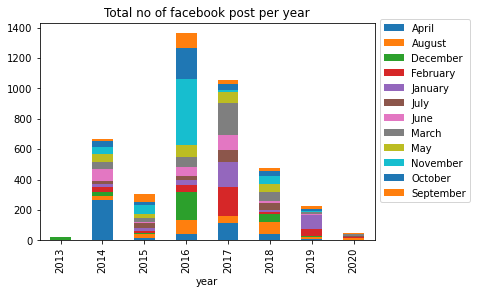

In [34]:
df_mypost.groupby(["year","month"]).size().unstack().plot(kind='bar',title="Total no of facebook post per year",stacked=True) 
plt.legend(bbox_to_anchor=(1.0, 1.04))

#### Total post by month in 2020

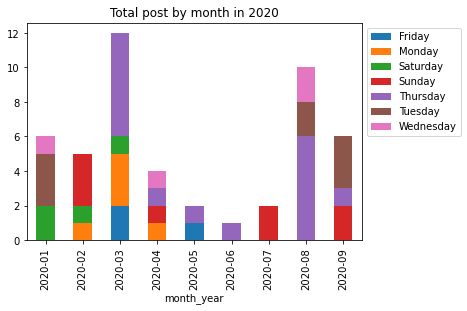

In [33]:
df_mypost[df_mypost['year']==2020].groupby(["month_year","week_day"]).size().unstack().plot(kind='bar',title="Total post by month in 2020",stacked=True) 
plt.legend(bbox_to_anchor=(1.0,1.0))

#### Avergae post per month in 2020

In [31]:
df_mypost[df_mypost['year']==2020].groupby(["month_year"]).data.count().mean()

5.333333333333333

In [12]:
df_mypost.columns

Index(['timestamp', 'data', 'title', 'attachments', 'year', 'month',
       'week_day', 'day', 'time', 'month_year'],
      dtype='object')

#### Average no of post in every week

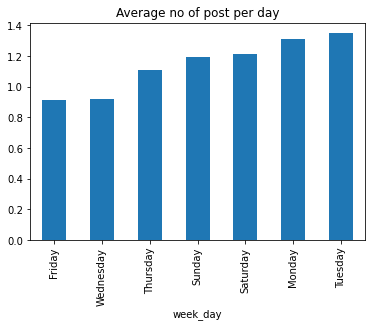

In [35]:
# Average posts per day 
weighted = df_mypost.groupby('year').week_day.value_counts(normalize=True).unstack().sum().sort_values().plot(kind='bar',title="Average no of post per day")

#### Daily fb post by hour period

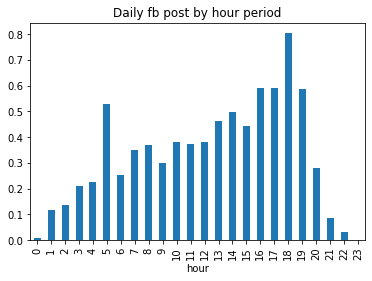

In [14]:
#facebook posts by hour, I need to split the first 2 digits from time
df_mypost['hour'] = df_mypost['time'].apply(lambda x: x.hour)
time_weight = df_mypost.groupby('year').hour.value_counts(normalize=True).unstack()
time_weight.sum().sort_index().plot(kind='bar',title="Daily fb post by hour period")

#### Most frequent post by months

[Text(0, 0, 'Jan'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sept'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec')]

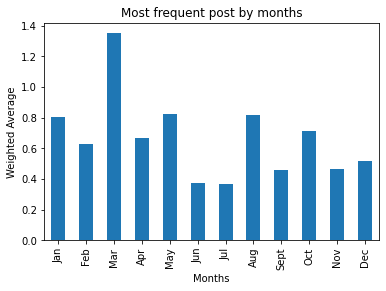

In [15]:
month_weight = df_mypost.groupby('year').month.value_counts(normalize=True).unstack()
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
fig, ax  = plt.subplots()
month_weight.sum().sort_index().plot(kind='bar')
plt.title('Most frequent post by months')
plt.ylabel('Weighted Average')
plt.xlabel('Months')
ax.set_xticklabels(labels)